In [141]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#학습용과 평가용 데이터 분리
from sklearn.model_selection import train_test_split

#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

#로지스틱 회귀
from statsmodels.api import Logit

#분류모델 평가 함수
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 나무 구조 시각화 및 의사결정나무
import graphviz 

from sklearn.tree import DecisionTreeClassifier, export_graphviz

# 랜덤 포레스트 분류
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [142]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/유방암.csv",encoding = 'euc-kr')
df_raw.head() # 데이터 불러오기

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [143]:
0

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis_음성
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740,1
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699,0
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938,1
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273,0
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0


In [144]:
df_raw_x = df_raw.drop("diagnosis_음성", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis_음성"]

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(\
  df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)
# test와 train으로 나눔

분할 전 설명변수 데이터: (320, 30)
분할 후 설명변수 데이터 : Train (192, 30)  Test (128, 30)


In [145]:
from imblearn.over_sampling import SMOTE
print(df_raw.value_counts(["diagnosis_음성"]),"\n")
print("diagnosis_음성 = 1 비율", df_raw.value_counts(df_raw["diagnosis_음성"] == 1)/len(df_raw))
# 목표변수 빈도 확인 및 산점도 확인

diagnosis_음성
1               212
0               108
dtype: int64 

diagnosis_음성 = 1 비율 diagnosis_음성
True     0.6625
False    0.3375
dtype: float64


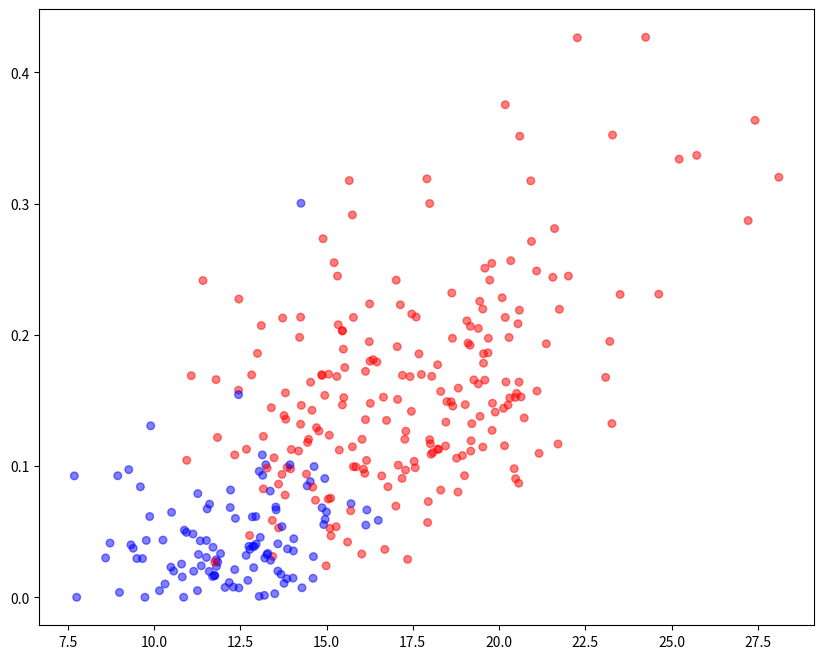

In [146]:
plt.figure(figsize = (10,8))
df_raw['color'] = np.where(df_raw["diagnosis_음성"] ==1, "red", "blue")
plt.scatter(df_raw['mean_radius'],df_raw['mean_concavity'], c=df_raw['color'], s= 30, alpha = 0.5)
plt.show()

In [147]:
sm = SMOTE(sampling_strategy = 'auto')
x_resampled, y_resampled = sm.fit_resample(df_train_x, df_train_y)
print('Over-Sampling 전: \n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y:{}\n'.format(y_resampled.shape))
print("Over-Sampling 후: '1':{}", format(sum(y_resampled ==1)))
print("Over-Sampling 후: '0':{}", format(sum(y_resampled ==0)))
# Over-Sampling 전 데이터 확인 결과 굳이 Over-Sampling을 하지 않아도 될 것 같음.

Over-Sampling 전: 
 1    115
0     77
Name: diagnosis_음성, dtype: int64 

Over-Sampling 후 Train X:(230, 30)
Over-Sampling 후 Train Y:(230,)

Over-Sampling 후: '1':{} 115
Over-Sampling 후: '0':{} 115


In [148]:
df_resampled = pd.concat([x_resampled,y_resampled], axis = 1)
print(df_resampled.head())
# 데이터 결합

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       13.150         15.34           85.31      538.9          0.09384   
1       15.750         19.22          107.10      758.6          0.12430   
2       20.640         17.35          134.80     1335.0          0.09446   
3       15.710         13.93          102.00      761.7          0.09462   
4        9.667         18.49           61.49      289.1          0.08946   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.08498         0.09293              0.03483         0.1822   
1           0.23640         0.29140              0.12420         0.2375   
2           0.10760         0.15270              0.08941         0.1571   
3           0.09462         0.07135              0.05933         0.1816   
4           0.06258         0.02948              0.01514         0.2238   

   mean_fractal_dimension  ...  worst_texture  worst_perimeter  worst_area  \
0             

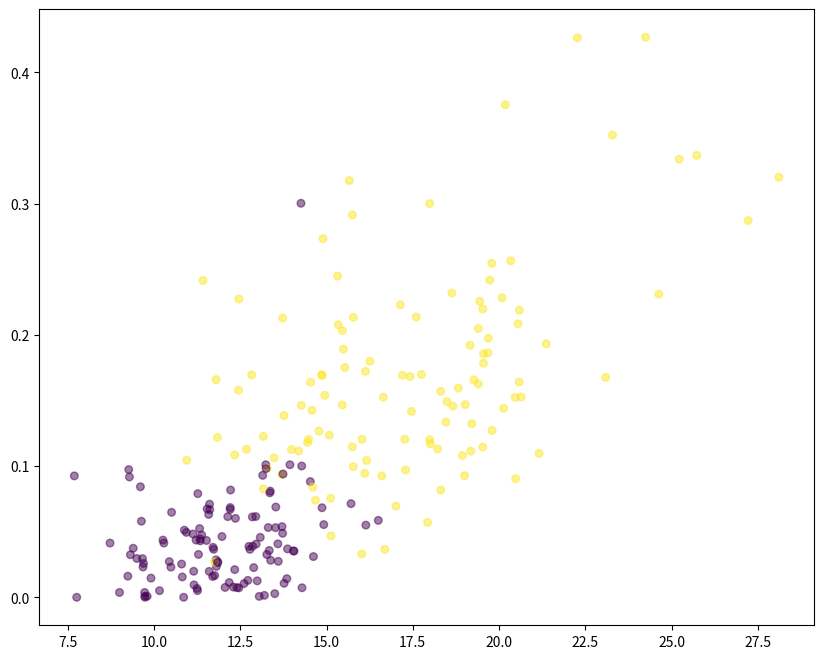

In [149]:
plt.figure(figsize = (10,8))
plt.scatter(df_resampled['mean_radius'], df_resampled['mean_concavity'],
           c = df_resampled['diagnosis_음성'], s= 30 , alpha =0.5)
plt.show()

In [150]:
tree_uncust = DecisionTreeClassifier(random_state = 1234)
tree_uncust.fit(df_train_x,df_train_y)

DecisionTreeClassifier(random_state=1234)

In [151]:
# 훈련 데이터 정확도
print("Accuracy on training set : {:.3f}".format(tree_uncust.score(df_train_x,df_train_y)))
# test 데이터 정확도
print("Accuracy on test set : {:.3f}".format(tree_uncust.score(df_test_x,df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.883


In [152]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [153]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(3,12)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state =1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장   
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,3,0.995,0.875
1,4,1.000,0.883
2,5,1.000,0.883
3,6,1.000,0.883
4,7,1.000,0.883
5,8,1.000,0.883
6,9,1.000,0.883
7,10,1.000,0.883
8,11,1.000,0.883


<function matplotlib.pyplot.legend(*args, **kwargs)>

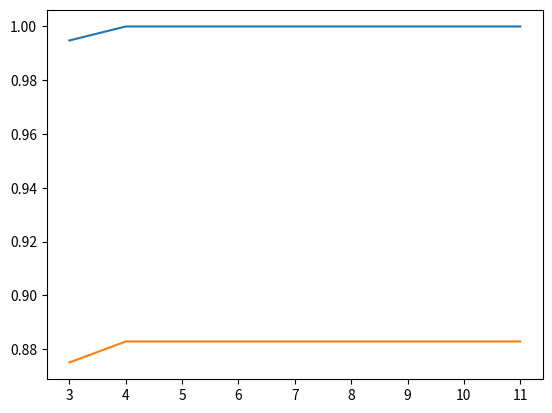

In [154]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend

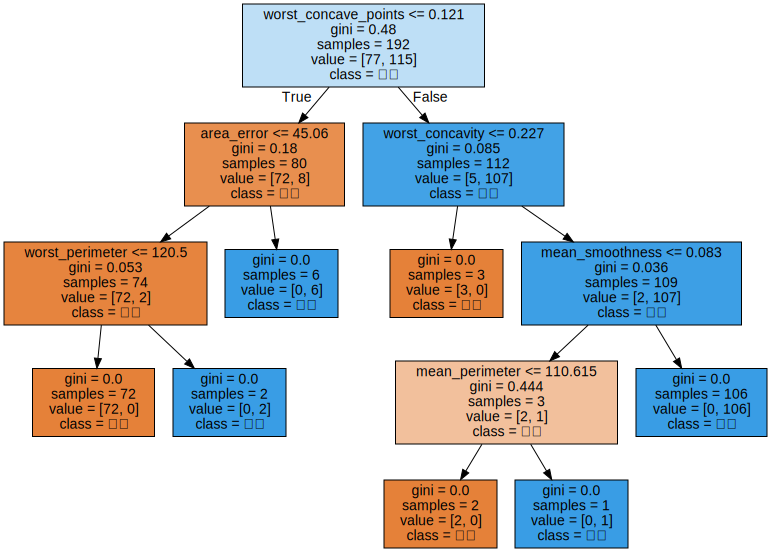

In [158]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["양성","음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

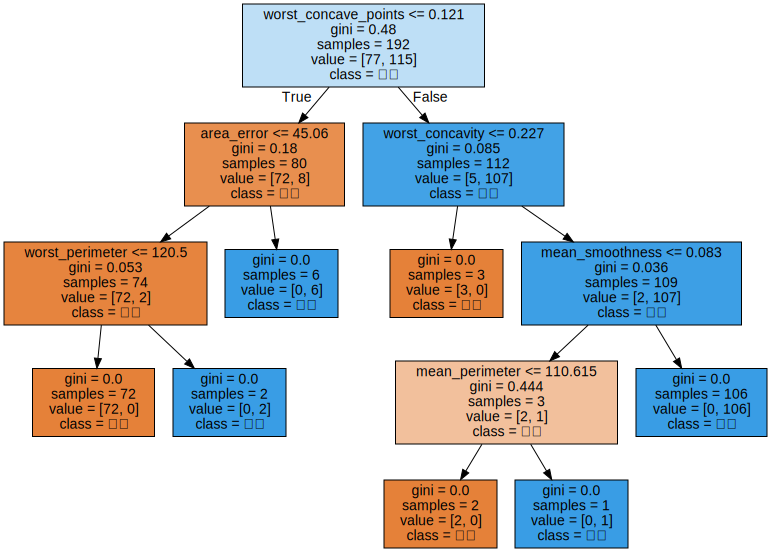

In [159]:
tree_high = DecisionTreeClassifier(max_depth = 7, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["양성","음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [160]:
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% = ", df_train_x.shape[0] * 0.01,"개")

전체 자료 =  192 개
전체 자료의 1% =  1.92 개


In [166]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(2,15)]

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 4, random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.995,0.875
1,30,0.995,0.875
2,40,0.995,0.875
3,50,0.995,0.875
4,60,0.995,0.875
5,70,0.995,0.875
6,80,0.984,0.867
7,90,0.953,0.844
8,100,0.953,0.844
9,110,0.948,0.852


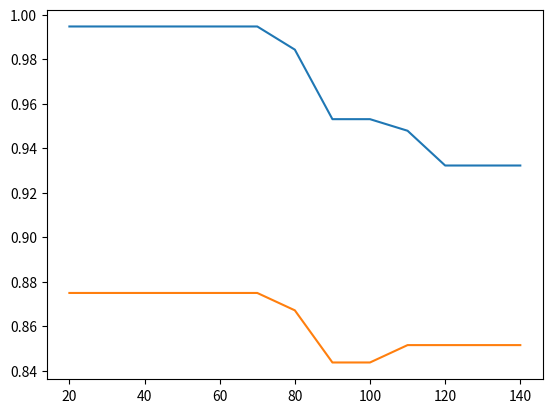

In [163]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "-", label = "Test Accuracy")

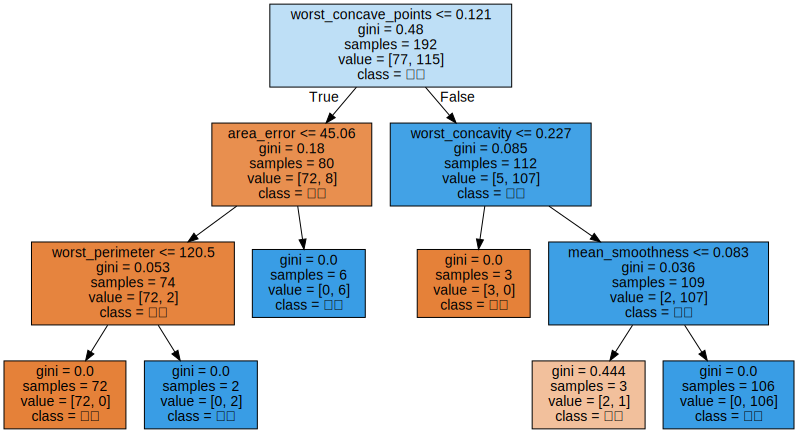

In [167]:
# tree_final.dot으로 결과 저장
tree_low = DecisionTreeClassifier(max_depth = 4,min_samples_split = 70, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["양성","음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

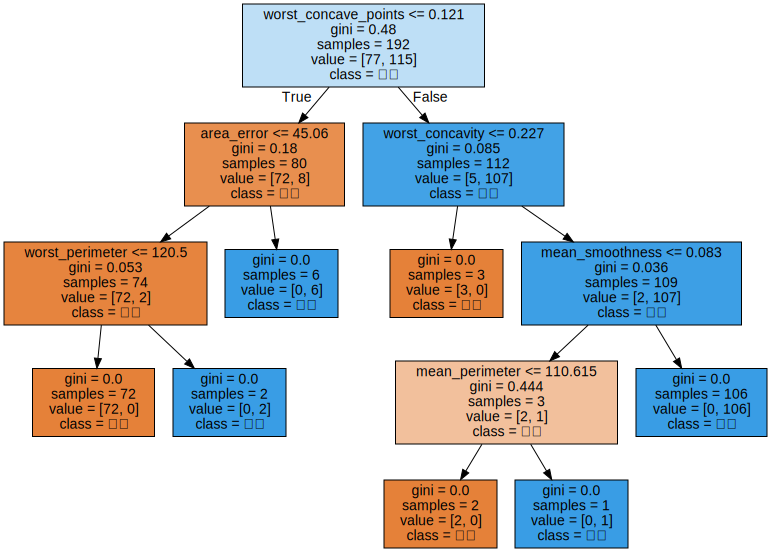

In [168]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
tree_high = DecisionTreeClassifier(max_depth =4,min_samples_split = 70, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_low.dot", class_names = ["양성","음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [172]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(2,16)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 4, min_samples_split = 50, random_state = 1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3) # 10개

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,4,0.974,0.859
1,6,0.964,0.859
2,8,0.958,0.898
3,10,0.953,0.914
4,12,0.943,0.906
5,14,0.932,0.852
6,16,0.932,0.852
7,18,0.932,0.852
8,20,0.932,0.852
9,22,0.932,0.852


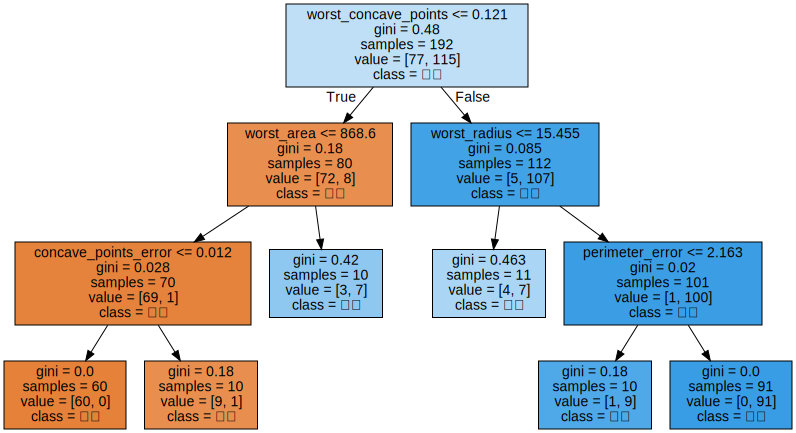

In [174]:
tree_low = DecisionTreeClassifier(max_depth = 4,min_samples_split = 50, min_samples_leaf = 10,random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["양성","음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

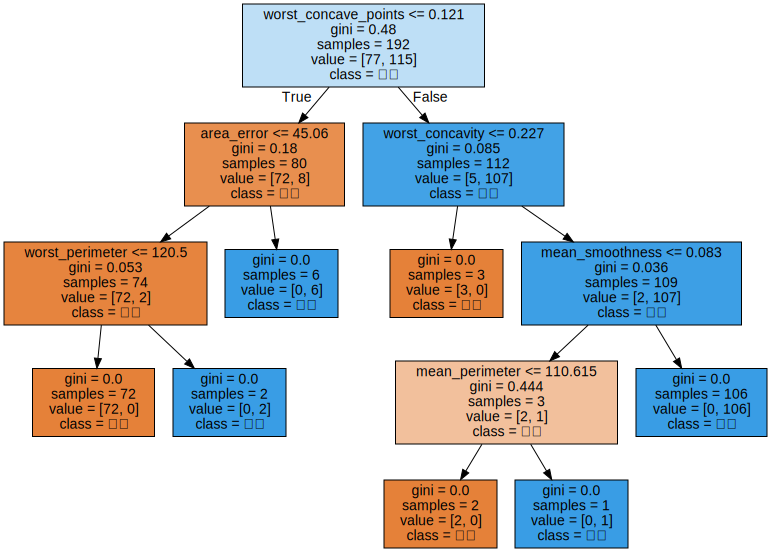

In [175]:
tree_high = DecisionTreeClassifier(max_depth = 4,min_samples_split = 50, min_samples_leaf = 10 ,random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_low.dot", class_names = ["양성","음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [176]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_split = 50, min_samples_leaf = 10, random_state = 1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=50,
                       random_state=1234)

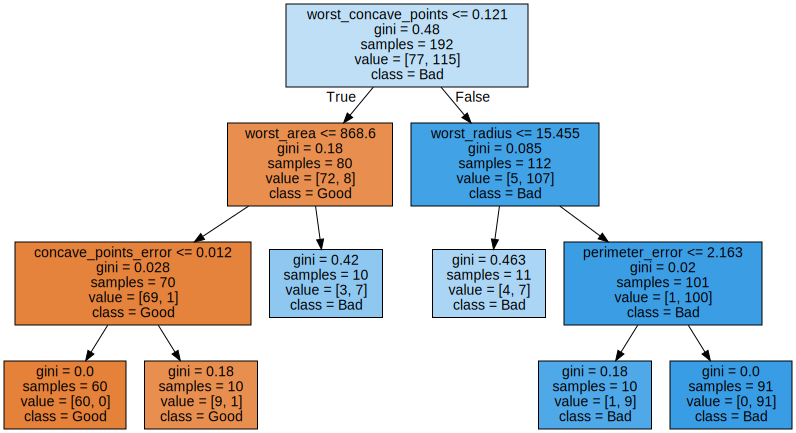

In [177]:
tree_final = DecisionTreeClassifier(max_depth = 4,min_samples_split = 50, min_samples_leaf = 10, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good","Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [178]:
y_pred = tree_final.predict(df_test_x)
print("Test Accuracy : {0:.3f}\n". format(tree_final.score(df_test_x,df_test_y)))
print("Test Confusion matrix :\n{}". format(confusion_matrix(df_test_y,y_pred)))

Test Accuracy : 0.914

Test Confusion matrix :
[[23  8]
 [ 3 94]]


In [179]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst_concave_points,0.861
23,worst_area,0.104
20,worst_radius,0.031
12,perimeter_error,0.002
17,concave_points_error,0.002
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000


Text(0, 0.5, '설명변수')

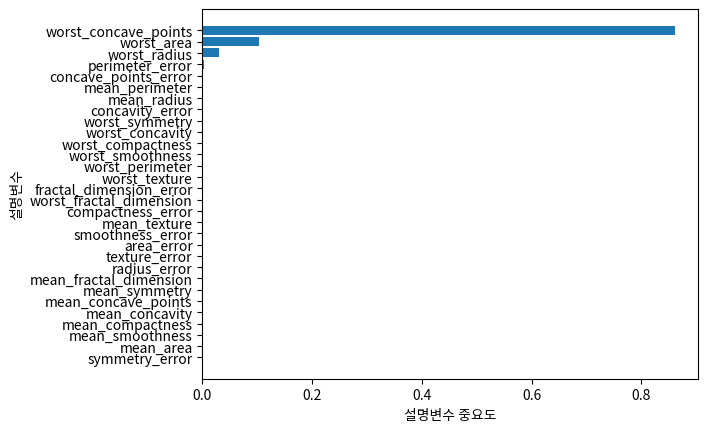

In [180]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# Worst_concave_points가 너무 높은 수치를 기록하고 있어서 좋은 모델로 볼 수 없음.

# 랜덤 포레스트 분류

In [181]:
rf_uncust = RandomForestClassifier(random_state = 1234)
rf_uncust.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.914


In [182]:
print(rf_uncust.get_params().keys())
print(rf_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


In [184]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["MinSamplesSplit"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

df_accuracy_n.round(3) 
# 110개 이후로는 0.930이후로 변화가 없으므로 110개를 선정

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.906
1,20,1.000,0.914
2,30,1.000,0.906
3,40,1.000,0.906
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.914


<function matplotlib.pyplot.legend(*args, **kwargs)>

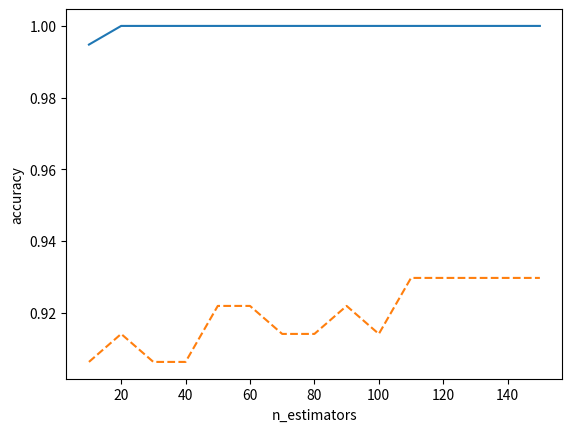

In [185]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend

In [186]:
oob_error =[]

for v_n_estimator in range(5,121):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs 

Text(0.5, 0, 'n_estimators')

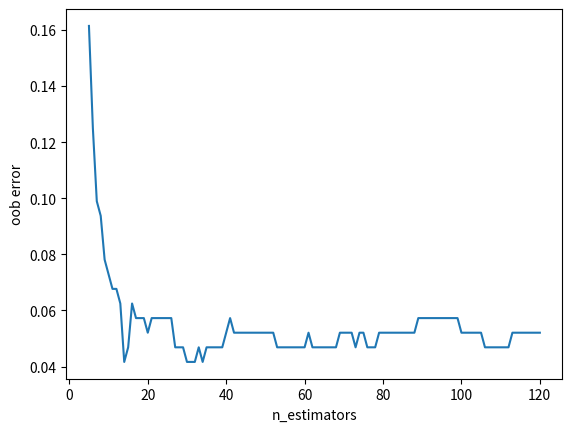

In [187]:
plt.plot(range(5,121), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [188]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(3,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth,n_estimators = 110, random_state =1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3) 
# depth 6이후로는 변화가 없으므로 6으로 선정 하지만 Train의 과대적합때문에 모델이 걱정됨

,Depth,TrainAccuracy,TestAccuracy
0,3,0.99,0.914
1,4,1.00,0.922
2,5,1.00,0.922
3,6,1.00,0.930
4,7,1.00,0.930
5,8,1.00,0.930
6,9,1.00,0.930
7,10,1.00,0.930


<function matplotlib.pyplot.legend(*args, **kwargs)>

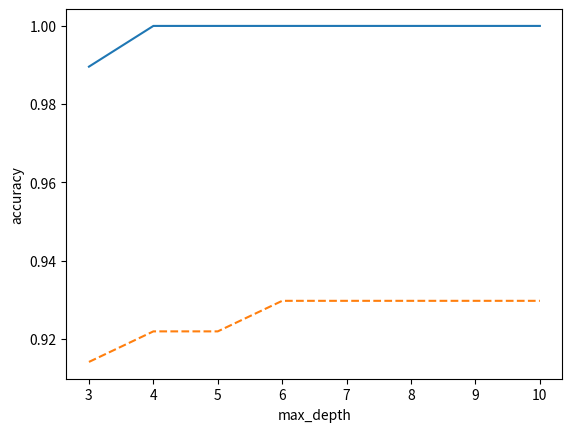

In [189]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max_depth"); plt.ylabel("accuracy")
plt.legend

In [191]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 6,n_estimators = 110, random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3) 
# 80이후로 변화가 없으므로 80을 선택

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.906
1,20,0.984,0.906
2,30,0.984,0.914
3,40,0.984,0.906
4,50,0.979,0.898
5,60,0.964,0.883
6,70,0.948,0.891
7,80,0.948,0.914
8,90,0.948,0.914
9,100,0.948,0.914


<function matplotlib.pyplot.legend(*args, **kwargs)>

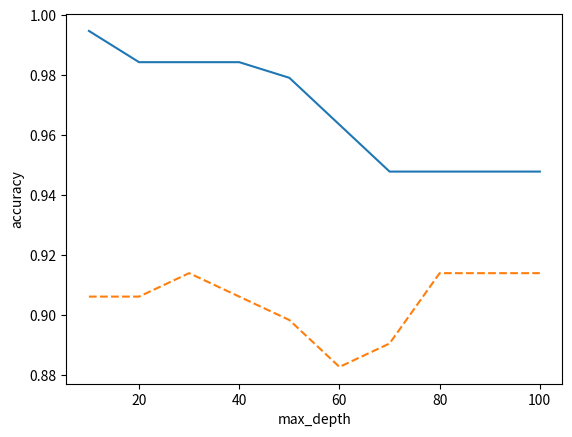

In [192]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max_depth"); plt.ylabel("accuracy")
plt.legend

In [197]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf *5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,min_samples_split = 80,
                                max_depth = 6,n_estimators = 110, random_state = 1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3) 
# 40개 전까지는 변화가 없지만 그 이후로는 변화가 생겼으므로 변화를 확인하기 이해 40개로 선정

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.948,0.914
1,10,0.948,0.914
2,15,0.948,0.914
3,20,0.948,0.914
4,25,0.948,0.914
5,30,0.948,0.914
6,35,0.948,0.914
7,40,0.948,0.906
8,45,0.948,0.906
9,50,0.964,0.914


<function matplotlib.pyplot.legend(*args, **kwargs)>

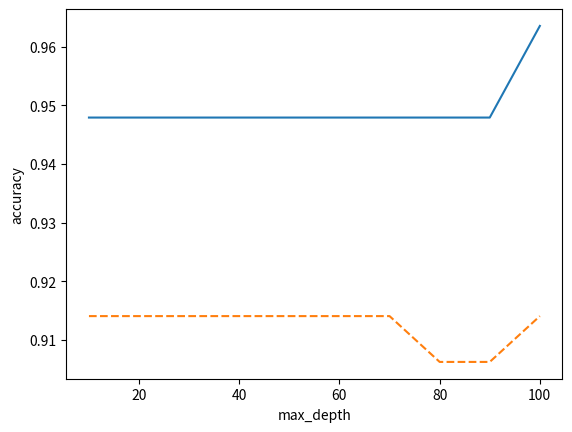

In [198]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max_depth"); plt.ylabel("accuracy")
plt.legend

In [200]:
rf_final = RandomForestClassifier(max_depth = 6,n_estimators = 110,min_samples_split = 80, min_samples_leaf = 40, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set : {:.3f}". format(rf_final.score(df_test_x,df_test_y)))
print("Accuracy on test set : {:.3f}". format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix :\n{}". format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits =3))

Accuracy on training set : 0.906
Accuracy on test set : 0.906
Confusion matrix :
[[25  6]
 [ 6 91]]
              precision    recall  f1-score   support

           0      0.806     0.806     0.806        31
           1      0.938     0.938     0.938        97

    accuracy                          0.906       128
   macro avg      0.872     0.872     0.872       128
weighted avg      0.906     0.906     0.906       128



실제 Negative인 데이터 중 모델이 정확하게 Negative로 예측한 개수는 25 
실제 Negative인 데이터 중 모델이 Positive로 잘못 예측한 개수는 6개 
실제 Positive인 데이터 중 모델이 Negative로 잘못 예측한 개수는 6개
실제 Positive인 데이터 중 모델이 정확하게 Positive로 예측한 개수는 91개 

정확도 (Accuracy): (TN + TP) / (TN + FP + FN + TP) 약 91.2%


정밀도 (Precision): TP / (TP + FP) = 91 / (91 + 6) 약 93.8%


재현율 (Recall 또는 Sensitivity): TP / (TP + FN) = 91 / (91 + 6) 약 93.8%


F1-score: 2 * (정밀도 * 재현율) / (정밀도 + 재현율) = 2 * (0.938 * 0.938) / (0.938 + 0.938) 약 93.8%
